In [ ]:
import torch
import torchvision

In [ ]:
x = torch.randn(5,3,3)
print(x)

tensor([[[ 0.3352,  0.9876,  0.0827],
         [-1.5636,  0.1391, -0.3277],
         [ 0.8780, -0.4341, -0.0438]],

        [[-0.1898, -0.0953,  0.4499],
         [-0.4097,  1.0606,  0.1925],
         [ 0.4507, -0.9940,  0.1619]],

        [[-1.9887, -1.3351,  0.5671],
         [ 0.9482,  0.1554, -0.9660],
         [-1.9924, -1.2418,  0.0972]],

        [[-1.1268,  1.2973, -0.2060],
         [-0.9610, -0.7055, -1.2501],
         [ 1.9099, -1.5135, -0.7445]],

        [[-1.4250,  1.4727,  0.6961],
         [-1.1545, -0.6267, -0.6740],
         [ 2.2974, -0.3165, -0.2855]]])


In [ ]:
3 - (0.05 *6)

2.7

In [ ]:
x.transpose(2,0)[None]

tensor([[[[ 0.3352, -0.1898, -1.9887, -1.1268, -1.4250],
          [-1.5636, -0.4097,  0.9482, -0.9610, -1.1545],
          [ 0.8780,  0.4507, -1.9924,  1.9099,  2.2974]],

         [[ 0.9876, -0.0953, -1.3351,  1.2973,  1.4727],
          [ 0.1391,  1.0606,  0.1554, -0.7055, -0.6267],
          [-0.4341, -0.9940, -1.2418, -1.5135, -0.3165]],

         [[ 0.0827,  0.4499,  0.5671, -0.2060,  0.6961],
          [-0.3277,  0.1925, -0.9660, -1.2501, -0.6740],
          [-0.0438,  0.1619,  0.0972, -0.7445, -0.2855]]]])

In [ ]:
!pip install thop

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone https://github.com/leftthomas/CGD

Cloning into 'CGD'...
remote: Enumerating objects: 835, done.
remote: Counting objects: 100% (834/834), done.
remote: Compressing objects: 100% (433/433), done.
remote: Total 835 (delta 397), reused 828 (delta 394), pack-reused 1
Receiving objects: 100% (835/835), 8.48 MiB | 17.90 MiB/s, done.
Resolving deltas: 100% (397/397), done.


In [ ]:
# !wget http://ai.stanford.edu/~jkrause/car196/cars_train.tgz

In [ ]:
# !tar -xzvf cars_train.tgz

## Load model and download data

In [ ]:
import argparse
import os
import matplotlib.pyplot as plt
from PIL import Image
from scipy.io import loadmat
from tqdm import tqdm
import numpy as np

import glob
import json

In [ ]:
!pip install arcface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install faiss-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85.5 MB 100 kB/s 


In [ ]:
from arcface import ArcFace
import matplotlib.image as mpimg

In [ ]:
image_re = ArcFace.ArcFace()

In [ ]:
### Download Dataset
!gdown --id 1--a-r9-mUqV1C3jIcc4edA5X-ipOaMN6
!unzip ./preproc_images.zip
!gdown --id 1nnzAz0OZx3OPDauN2R7H6aTUnkNb2eYT

## Processing data

In [ ]:
# Creating a dictionary of image file paths.
dic_categories = ['scenery', 'furniture', 'animal', 'plant'] 
root_img_path = '/content/images'
files = []
for folder in os.listdir(root_img_path):
  if folder.split("_")[0] in dic_categories:
    path = os.path.join(root_img_path, folder)
    list_dir = [name for name in glob.glob(path+'/*') if name.endswith((".jpg", ".png", ".jpeg"))]
    for file in list_dir[:20]:
      files.append(file)
      
id2img_fps = dict(enumerate(files))## enumerate included: index and values

with open('/content/image_path.json', 'w') as f:
  f.write(json.dumps(id2img_fps))

In [ ]:
### Load index Images
def jsonKeys2int(js):
    """
    It takes a json file and converts all the keys to integers
    
    :param js: the json file
    :return: A dictionary with the keys as integers and the values as the image file paths.
    """
    if isinstance(js, dict):
            return {int(k):v for k,v in js.items()}
    return js

with open('/content/image_path.json', 'r') as f:
  id2img_fps = jsonKeys2int(json.loads(f.read()))

In [ ]:
images_dict = {}

for key, value in id2img_fps.items():
  emb = image_re.calc_emb(f"{value}")
  images_dict[f"{value}"] = emb

In [ ]:
query_path = '/content/apple.jpg'
query_emb = image_re.calc_emb(query_path)

In [ ]:
def show_imgs(query, f_ids):
  """
  It takes in a query image and a list of filepaths to images, and displays the query image and the
  top 6 images from the list of filepaths
  
  :param query: the image we want to find similar images to
  :param f_ids: the list of file ids of the images that are most similar to the query image
  """
  plt.imshow(mpimg.imread(query))
  fig = plt.figure(figsize=(12, 12))
  columns = 4
  rows = 3
  for i in range(1, columns*rows +1):
    img = mpimg.imread(f_ids[:columns*rows +1][i - 1][0])
    ax = fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis("off")
  plt.show()

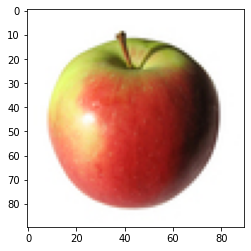

In [ ]:
plt.imshow(mpimg.imread('/content/images/plant_Apple/0.9154808605283119.jpg'))

In [ ]:
sorces = {}

for key, value in images_dict.items():
  distance = image_re.get_distance_embeddings(query_emb,value)
  sorces[key] = distance

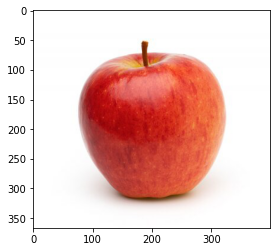

In [ ]:
plt.imshow(mpimg.imread(query_path))

In [ ]:
sorted_socres = [[k,v] for k, v in sorted(sorces.items(), key=lambda item: item[1])]
sorted_socres[:7][1][0]

'/content/images/furniture_Bowl/0.7064802698380981.jpg'

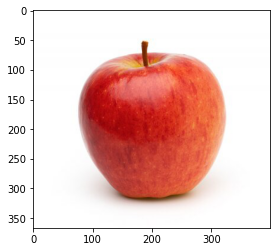

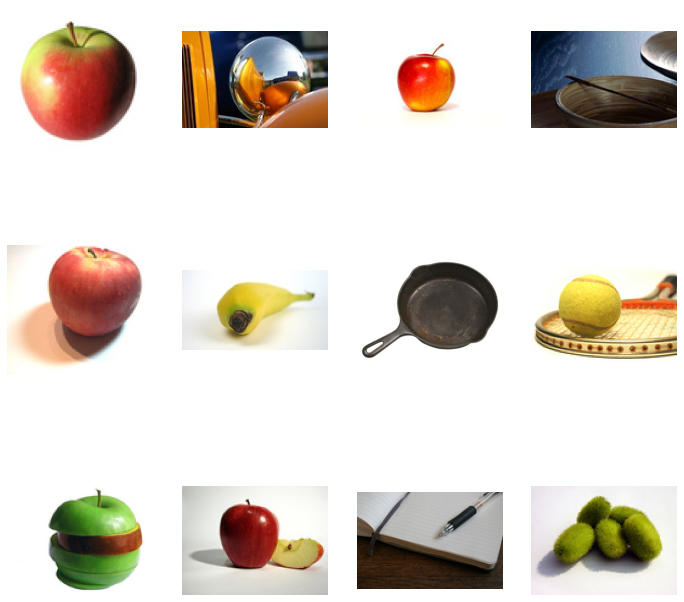

In [ ]:
show_imgs(query_path,sorted_socres )